# Bioinformatics Aligrithms
> Bioinformatics Algorithms Design and Implementation in Python

> Miguel Rocha University of Minho, Braga, Portugal

> Pedro G. Ferreira Ipatimup/i3S, Porto, Portugal

## Pattern Recognition of Sequence
### Approach
*  Naive Algorithm

### Jobs
* Enzyme Binding Site with ligands
* Promoter, Enhancer, Transcription Factor and so on of DNA
* Repeated Segments

### Patterns
* Fixed Pattern $\rightarrow$ 算法复杂度
* 灵活模式 $\rightarrow$ 正则表达式

####  Naive Algorithm for Fixed Pattern Finding
Example1: 匹配句子中的某一单词
##### Description
A naive approach to search for the occurrence of a pattern p (of length k) in a sequence s (of length N>k) is to consider __all possible sub-sequences of s__, of size k, and compare each of those, position by position, to p. Once a mismatch is found, we can move to test the next sub-sequence.

If the sub-sequence matches the pattern in all positions, an occurrence of p is found. If the purpose is to find all occurrences of p in s, we must continue even in case of success, while if it is only required to find the first occurrence (or simply if the pattern occurs), we can stop when the first sub-sequence matches p.

Both variants are implemented in the Python functions provided in the following code block.

The ```search_first_occ``` function uses an outer while cycle that finishes when the pattern is found, or the last sub-sequence is tested. The function returns the position of the first occurrence of the pattern, or if the pattern does not occur returns −1.

The ```search_all_occurrences``` function uses a for cycle that tests for all possible subsequences (note that there are N − k + 1 possible positions where the pattern may occur), and returns a list with all initial positions of the pattern’s occurrences (the list is empty if the pattern does not occur).

In [1]:
def search_first_occ(seq, pattern): 
    found = False
    i=0
    while i <= len(seq)-len(pattern) and not found:
        j=0
        while j < len(pattern) and pattern[j]==seq[i+j]:
            j=j+1
        if j == len(pattern): found = True 
        else: i += 1
    if found: return i
    else: return -1
    

def search_all_occurrences(seq, pattern): 
    res = []
    for i in range(len(seq)-len(pattern)+1):
        j=0
        while j < len(pattern) and pattern[j]==seq[i+j]:
            j=j+1
        if j == len(pattern):
            res.append(i) 
    return res

In [2]:
seqDNA = "ATAGAATAGATAATAGTC"
print(search_first_occ(seqDNA, "GAAT")) 
print(search_first_occ(seqDNA, "TATA")) 
print(search_all_occurrences(seqDNA, "AAT"))
print()
print(seqDNA.find("GAAT"))
print(seqDNA.find("TATA"))
print(
    sorted(
        set(
            filter(
                lambda x: x != -1, (
                    seqDNA.find("AAT",i) for i in range(len(seqDNA))
                )
            )
        )
    )
)

3
-1
[4, 11]

3
-1
[4, 11]


In [3]:
"TAGAATAGATAATAGTC".find("AAT")

3

In [4]:
help(str.find)

Help on method_descriptor:

find(...)
    S.find(sub[, start[, end]]) -> int
    
    Return the lowest index in S where substring sub is found,
    such that sub is contained within S[start:end].  Optional
    arguments start and end are interpreted as in slice notation.
    
    Return -1 on failure.



####   Heuristic Algorithm: _Boyer-Moore_
> 跳跃，减少无用步数，同时考虑潜在可能


ABC __D__ EACD 

EAC __D__

ABCD __EACD__

0OO0 __EACD__

从左到右，从末尾往前匹配
##### 坏字符规则

##### 好后缀规则

__注意，位置从0开始计算__

In [5]:
class BoyerMoore:
    # initialized object of this class 
    def __init__(self, alphabet, pattern):
        self.alphabet = alphabet
        self.pattern = pattern
        self.preprocess()
        
    def preprocess(self):
        self.process_bcr()
        self.process_gsr()
    
    def process_bcr(self):
        self.occ = {}
        # 初始化全集字典
        for symb in self.alphabet:
            self.occ[symb] = -1
        # 更新全集字典，存储各个字符在Pattern中最后出现的位置
        for j in range(len(self.pattern)):
            c = self.pattern[j]
            self.occ[c] = j
    
    def process_gsr( self ):
        # 初始化两个Pattern列表用以记录Pattern中的重复字符
        # 初始化Pattern列表 1
        self.f = [0] * (len(self.pattern)+1)
        # 初始化Pattern列表 2
        self.s = [0] * (len(self.pattern)+1)
        i = len(self.pattern)
        j = len(self.pattern)+1
        # 定义Pattern列表 1的最后元素为pattern长度+1
        self.f[i] = j
        # 查找Pattern中非重复字符的位置差并存于列表2中，
        while i>0:
            while j<= len(self.pattern) and self.pattern[i-1]!=self.pattern[j-1]:
                if self.s[j] == 0: self.s[j] = j-i;
                # 修正Index
                j = self.f[j]
            i -= 1
            j -= 1
            self.f[i] = j
        j = self.f[0]
        for i in range(len(self.pattern)):
            if self.s[i] == 0: self.s[i] = j
            if i == j: j = self.f[j]

    def search_pattern(self, text):
        res = []
        i=0
        while i <= len(text) - len(self.pattern):
            j= len(self.pattern)- 1
            while j>=0 and self.pattern[j]==text[j+i]: j -= 1
            if (j<0):
                res.append(i)
                i += self.s[0]
            else:
                c = text[j+i]
                i += max(self.s[j+1], j-self.occ[c])
        return res

In [6]:
bm = BoyerMoore("ACTG", "ACCA")
print(bm.search_pattern("ATAGAACCAATGAACCATGATGAACCATGGATACCCAACCACC"))

[5, 13, 23, 37]


In [7]:
pattern="ACCA"
f = [0] * (len(pattern)+1)
 # 初始化Pattern列表 2
s = [0] * (len(pattern)+1)
i = len(pattern)
j = len(pattern)+1
# 定义Pattern列表 1的最后元素为pattern长度+1
f[i] = j

In [8]:
f,s,i,j

([0, 0, 0, 0, 5], [0, 0, 0, 0, 0], 4, 5)

In [9]:
print(j<= 4 and pattern[3-1]!=pattern[4-1])
print(pattern[3-1],pattern[4-1])

False
C A


In [10]:
# 查找Pattern中非重复字符的位置差并存于列表2中，
while i>0:
    '''
     [A, C, C, A   ]
      0  1  2  3
      |  |  |  |
    f[0, 0, 0, 4, 5]
    i       ^  |
    j          ^  |
    s[0, 0, 0, 0, 0]
    '''
    while j<= len(pattern) and pattern[i-1]!=pattern[j-1]:
        if s[j] == 0: s[j] = j-i;
        # 修正Index
        j = f[j]
    i -= 1
    j -= 1
    f[i] = j

In [11]:
f,s,i,j

([3, 4, 4, 4, 5], [0, 0, 0, 0, 1], 0, 3)

In [12]:
def find_all_occurrences_re(seq, pat):
    from re import finditer
    mos = finditer(pat, seq)
    res = []
    for x in mos:
        res.append(x.span()[0])
    return res


def find_all_overlap(seq, pat, mode=1):
    if mode == 1:
        return find_all_occurrences_re(seq, "(?=" + pat + ")")
    else:
        return find_all_occurrences_re(seq, pat)


def test(seq, pat, mode):
    all_ov = find_all_overlap(seq, pat, mode)
    if len(all_ov) > 0:
        print("Pattern found in positions: ", all_ov)
    else:
        print("Pattern not found")

In [13]:
import re

In [14]:
re.findall("CC","ATCCCGTCG")

['CC']

In [15]:
test('ATCCCGTCG','CC', 1)
test('ATCCCGTCG','CC',0)

Pattern found in positions:  [2, 3]
Pattern found in positions:  [2]


### Sequence Alignment
> 与运筹学、最优化相关问题的全局最优、局部最优相似

* global alignment
* local alignment
* gaps

#### Definitions
* 同源性
* 相似性
* 一致性?

#### Application
1. Global Alignment: 适用于非常相似且长度近似相等的序列
2. Local Alignment: 适用于一些片段相似而另一些片段相异的序列

#### Visualization
1. Dotlet -> 寻找单个序列中的重复片段
2. HeatMap -> SAME


In [16]:
# 最简情况: 二元矩阵
# From TEACHER
#1. dot plot
def create_mat(nrows, ncols):
    #create a matrix filled with zero
    mat = []
    for i in range(nrows):
        mat.append([])
        for j in range(ncols):
            mat[i].append(0)
    return mat

def dotplot(seq1, seq2):
    #construct the dot matrix
    mat = create_mat(len(seq1), len(seq2))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                mat[i][j] = 1
    return mat

def print_dotplot(mat, s1, s2):
    #print dotplot matrix
    import sys
    sys.stdout.write(" " + s2+"\n")
    for i in range(len(mat)):
        sys.stdout.write(s1[i])
        for j in range(len(mat[i])):
            if mat[i][j] >= 1:
                sys.stdout.write("∗")
            else:
                sys.stdout.write(" ")
        sys.stdout.write("\n")
        
s1 = "CGATATAG"
s2 = "TATATATT"
mat1 = dotplot(s1, s2)
print_dotplot(mat1, s1, s2)

 TATATATT
C        
G        
A ∗ ∗ ∗  
T∗ ∗ ∗ ∗∗
A ∗ ∗ ∗  
T∗ ∗ ∗ ∗∗
A ∗ ∗ ∗  
G        


> Since, in many cases, this simple algorithm leads to much noise, it is common to ﬁlter the results. ___One of the possible strategies is to consider a window around each position, and count the number of matching characters for each sequence in such neighborhood.___ In this case, we only ﬁll a given cell if, within this neighborhood, the number of matching characters exceeds a given parameter, typically named as stringency. A function implementing this strategy is given below.

In [17]:
def extended_dotplot (seq1, seq2, window, stringency):
    mat = create_mat(len(seq1), len(seq2))
    start = int(window/2)
    for i in range(start,len(seq1)-start):
        for j in range(start, len(seq2)-start):
            matches = 0
            l = j-start
            for k in range(i-start, i+start+1):
                if seq1[k] == seq2[l]: matches += 1
                l += 1
                if matches >= stringency: mat[i][j] = 1
    return mat

s1 = "CGATATAGATT"
s2 = "TATATAGTAT"
mat2 = extended_dotplot(s1, s2, 5, 4)
print_dotplot(mat2, s1, s2)

 TATATAGTAT
C          
G          
A          
T  ∗       
A   ∗      
T  ∗ ∗     
A   ∗ ∗    
G  ∗       
A          
T          
T          


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [19]:
def dotlet_plot(seq1, seq2, window, stringency):
    # assert window>=stringency, "Invalid Input ! window should >= stringency"
    # seq_index = [i for i in seq]
    df = pd.DataFrame([[0]*len(seq1) for i in seq2])# , columns=seq_index, index=seq_index)
    '''
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                df[i][j] = 1
    '''
    start = int(window/2)
    for i in range(start,len(seq1)-start):
        for j in range(start, len(seq2)-start):
            '''
            In this case, we only fill a given cell if,
            within this neighborhood, the number of matching
            characters exceeds a given parameter(stringency)
            '''
            matches = 0
            # Creact a window
            l = j-start # ROW
            for k in range(i-start, i+start+1): # COL
                '''
                i-start -> i+start+1
                length: 2*start + 1
                => 
                '''
                if seq1[k] == seq2[l]:
                    matches += 1
                l += 1 # ROW
                if matches >= stringency: # and seq1[i] == seq2[j]:
                    df[i][j] = 1
                    break
    return df

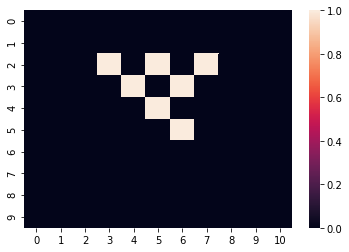

In [20]:
sns.heatmap(dotlet_plot(s1,s2,5,4))

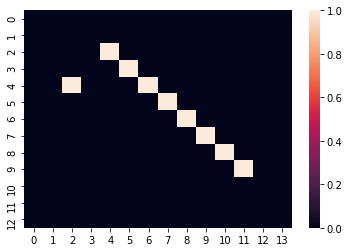

In [21]:
sns.heatmap(dotlet_plot("CCATCTATCGGATA","ATCTATCGGATAC",5,4))

#### Improvment
* 目标函数
    * 替换矩阵 $round(2\,\log_{2}^{\frac{P(a,b)}{P(a)\,P(b)}})$
    * 空位罚分

> $P(ab) = P(a|b)\,P(b) = P(b|a)\,P(a) \Rightarrow \frac{P(a,b)}{P(a)\,P(b)} = \frac{P(a|b)}{P(a)} = \frac{P(b|a)}{P(b)}$



* BLOSUM62 MATRIX

#### Dynamic Programming
* Needleman-Wunsch
* Smith-Waterman

In [22]:
from Bio.SubsMat import MatrixInfo
matrix = MatrixInfo.blosum62

In [23]:
matrix

{('W', 'F'): 1,
 ('L', 'R'): -2,
 ('S', 'P'): -1,
 ('V', 'T'): 0,
 ('Q', 'Q'): 5,
 ('N', 'A'): -2,
 ('Z', 'Y'): -2,
 ('W', 'R'): -3,
 ('Q', 'A'): -1,
 ('S', 'D'): 0,
 ('H', 'H'): 8,
 ('S', 'H'): -1,
 ('H', 'D'): -1,
 ('L', 'N'): -3,
 ('W', 'A'): -3,
 ('Y', 'M'): -1,
 ('G', 'R'): -2,
 ('Y', 'I'): -1,
 ('Y', 'E'): -2,
 ('B', 'Y'): -3,
 ('Y', 'A'): -2,
 ('V', 'D'): -3,
 ('B', 'S'): 0,
 ('Y', 'Y'): 7,
 ('G', 'N'): 0,
 ('E', 'C'): -4,
 ('Y', 'Q'): -1,
 ('Z', 'Z'): 4,
 ('V', 'A'): 0,
 ('C', 'C'): 9,
 ('M', 'R'): -1,
 ('V', 'E'): -2,
 ('T', 'N'): 0,
 ('P', 'P'): 7,
 ('V', 'I'): 3,
 ('V', 'S'): -2,
 ('Z', 'P'): -1,
 ('V', 'M'): 1,
 ('T', 'F'): -2,
 ('V', 'Q'): -2,
 ('K', 'K'): 5,
 ('P', 'D'): -1,
 ('I', 'H'): -3,
 ('I', 'D'): -3,
 ('T', 'R'): -1,
 ('P', 'L'): -3,
 ('K', 'G'): -2,
 ('M', 'N'): -2,
 ('P', 'H'): -2,
 ('F', 'Q'): -3,
 ('Z', 'G'): -2,
 ('X', 'L'): -1,
 ('T', 'M'): -1,
 ('Z', 'C'): -3,
 ('X', 'H'): -1,
 ('D', 'R'): -2,
 ('B', 'W'): -4,
 ('X', 'D'): -1,
 ('Z', 'K'): 1,
 ('F', 'A'): -

In [24]:
aa_li = [i for i in 'ACDEFGHIKLMNPQRSTVWY']

In [25]:
l = len(aa_li)
a = pd.DataFrame([[0]*l for i in aa_li])
for i in range(l):
    for j in range(l):
        try:
            a[i][j] = matrix[(aa_li[i],aa_li[j])]
        except KeyError:
            a[i][j] = matrix[(aa_li[j],aa_li[i])]

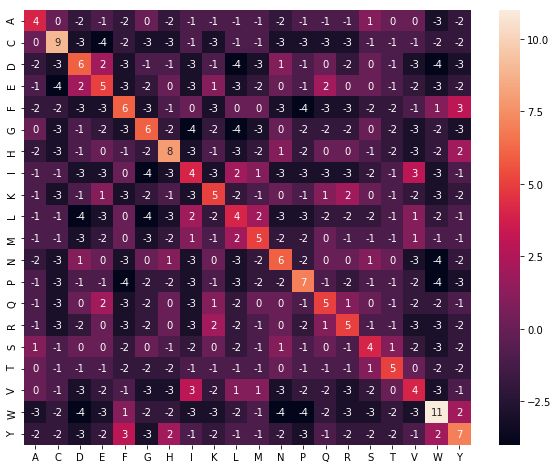

In [26]:
fig = plt.figure(figsize=(10, 8))
a.columns=aa_li
a.index=aa_li
sns.heatmap(a,annot=True)

In [27]:
# Needleman-Wunsch
def score_pos (c1, c2, sm, g):
    if c1 == "−" or c2=="−":
        return g
    else:
        if isinstance(sm, dict):
            return sm[c1+c2]
        else:
            return sm[c1][c2]
    
    
def read_submat_file (filename): 
    sm = {}
    f = open(filename , "r") 
    line = f.readline() 
    tokens = line.split("\t") 
    ns = len(tokens)
    alphabet = []
    for i in range(0, ns):
        alphabet.append(tokens[i][0]) 
    for i in range(0,ns):
        line = f.readline();
        tokens = line.split("\t");
        for j in range(0, len(tokens)):
            k = alphabet[i]+alphabet[j]
            sm[k] = int (tokens[j]) 
    return sm


def needleman_Wunsch (seq1, seq2, sm, g):
    S = [[0]]
    T = [[0]]
    ## initialize gaps’ row
    for j in range(1, len(seq2)+1):
        S[0].append(g * j)
        T[0].append(3)
    ## initialize gaps’ column
    for i in range(1, len(seq1)+1):
        S.append([g * i])
        T.append([2])
    ## apply the recurrence relation to fill the remaining of the matrix
    for i in range(0, len(seq1)):
        for j in range(len(seq2)):
            s1 = S[i][j] + score_pos(seq1[i],seq2[j],sm,g);
            s2 = S[i][j+1] + g
            s3 = S[i+1][j] + g
            S[i+1].append(max(s1, s2, s3))
            T[i+1].append(max3t(s1, s2, s3))
    return (S, T)

def max3t (v1, v2, v3):
    if v1 > v2:
        if v1 > v3: return 1
        else: return 3
    else:
        if v2 > v3: return 2
        else: return 3


def recover_align (T, seq1, seq2):
    res = ["", ""]
    i = len(seq1)
    j = len(seq2)
    while i>0 or j>0:
        if T[i][j]==1:
            res[0] = seq1[i-1] + res[0]
            res[1] = seq2[j-1] + res[1]
            i -= 1
            j -= 1
        elif T[i][j] == 3:
            res [0] = "−" + res [0]
            res[1] = seq2[j-1] + res[1]
            j -= 1
        else:
            res[0] = seq1[i-1] + res[0]
            res [1] = "−" + res [1]
            i -= 1
    return res


def print_mat(mat):
    for i in range(0, len(mat)):
        print(mat[i])

def test_global_alig(sm):
    # sm = read_submat_file("blosum62.mat") 
    seq1 = "PHSWG"
    seq2 = "HGWAG"
    res = needleman_Wunsch(seq1, seq2, sm, -8)
    S = res [0]
    T = res [1]
    print("Score of optimal alignment:", S[len(seq1)][len(seq2)]) 
    print_mat(S)
    print_mat(T)
    alig = recover_align(T, seq1, seq2)
    print(alig[0]) 
    print(alig[1])

In [28]:
test_global_alig(a)

Score of optimal alignment: 9
[0, -8, -16, -24, -32, -40]
[-8, -2, -10, -18, -25, -33]
[-16, 0, -4, -12, -20, -27]
[-24, -8, 0, -7, -11, -19]
[-32, -16, -8, 11, 3, -5]
[-40, -24, -10, 3, 11, 9]
[0, 3, 3, 3, 3, 3]
[2, 1, 3, 3, 1, 3]
[2, 1, 1, 3, 3, 1]
[2, 2, 1, 1, 1, 3]
[2, 2, 2, 1, 3, 3]
[2, 2, 1, 2, 1, 1]
PHSW−G
−HGWAG


In [29]:
# Smith-Waterman
def smith_Waterman (seq1, seq2, sm, g): 
    S = [[0]]
    T = [[0]]
    maxscore = 0
    for j in range(1, len(seq2)+1):
        S[0].append(0)
        T[0].append(0)
    for i in range(1, len(seq1)+1):
        S.append([0])
        T.append([0])
    for i in range(0, len(seq1)):
        for j in range(len(seq2)):
            s1 = S[i][j] + score_pos (seq1[i], seq2[j], sm, g); 
            s2 = S[i][j+1] + g
            s3 = S[i+1][j] + g
            b = max(s1, s2, s3)
            if b <= 0: 
                S[i+1].append(0) 
                T[i+1].append(0)
            else:
                S[i+1].append(b) 
                T[i+1].append(max3t(s1, s2, s3))
                if b > maxscore: 
                    maxscore = b
    return (S, T, maxscore)  

def recover_align_local (S, T, seq1, seq2): 
    res = ["", ""]
    i, j = max_mat(S) 
    while T[i][j]>0:
        if T[i][j]==1:
            res[0] = seq1[i-1] + res[0] 
            res[1] = seq2[j-1] + res[1]
            i -= 1
            j -= 1
        elif T[i][j] == 3:
            res [0] = "−" + res [0];
            res[1] = seq2[j-1] + res[1]
            j -= 1
        elif T[i][j] == 2:
            res[0] = seq1[i-1] + res[0]
            res [1] = "-" + res [1]
            i -= 1
    return res

def max_mat(mat):
    maxval = mat [0][0]
    maxrow = 0
    maxcol = 0
    for i in range(0,len(mat)):
        for j in range(0, len(mat[i])):
            if mat[i][j] > maxval:
                maxval = mat[i][j]
                maxrow = i
                maxcol = j
    return (maxrow,maxcol)

def test_local_alig(sm):
    # sm = read_submat_file("blosum62.mat")
    seq1 = "HGWAG"
    seq2 = "PHSWG"
    res = smith_Waterman(seq1, seq2, sm, -8)
    S = res [0]
    T = res [1]
    print("Score of optimal alignment:", res[2])
    print_mat(S)
    print_mat(T)
    alinL= recover_align_local(S, T, seq1, seq2)
    print(alinL[0])
    print(alinL[1]) 

In [30]:
test_local_alig(a)

Score of optimal alignment: 19
[0, 0, 0, 0, 0, 0]
[0, 0, 8, 0, 0, 0]
[0, 0, 0, 8, 0, 6]
[0, 0, 0, 0, 19, 11]
[0, 0, 0, 1, 11, 19]
[0, 0, 0, 0, 3, 17]
[0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 3]
[0, 0, 0, 1, 2, 1]
[0, 0, 0, 0, 2, 1]
HGW
HSW


### BLAST

SIMPLE VERSION: 
* 匹配分数简化
* 只考虑精确匹配，未考虑neighbor
* 

> Hit $\rightarrow$ HSP(high-scoring segment pair)

$\Downarrow$

In [31]:
def best_alignment (db, query, w):
    # Get words(list) of query sequence
    m = build_map(query, w)
    # Initialization
    bestScore = -1.0
    res = (0,0,0,0,0)
    # Traversing
    for k in range(0,len(db)):
        bestSeq = hit_best_score(db[k], query, m, w)
        if bestSeq != ():
            score = bestSeq [3]
            # Choose seq with better score or same score but better size among each db sequences
            if score > bestScore or (score== bestScore and bestSeq[2] < res[2]):
                bestScore = score
                res = bestSeq[0], bestSeq[1], bestSeq[2], bestSeq[3], k
    if bestScore < 0:
        return ()
    else:
        return res

def build_map (query, w):
    res = {}
    for i in range(len(query)-w+1):
        subseq = query[i:i+w]
        if subseq in res:
            res[subseq].append(i)
        else:
            res[subseq] = [i]
    return res

def hit_best_score(seq, query, m, w):
    # Get the word-index of db sequence
    hits = get_hits(seq, m, w)
    # Initialization
    bestScore = -1.0
    best = ()
    # Traversing
    for h in hits:
        # 
        ext = extends_hit(seq, h, query, w)
        score = ext[3] # matched count
        # Choose seq with better score or same score but better size among each hits(extended)
        if score > bestScore or (score== bestScore and ext[2] < best [2]):
            bestScore = score
            best = ext
    return best

def get_hits (seq, m, w):
    '''
    m：words列表
    return (搜索序列中匹配上的下标,目标序列中匹配上的下标)
    '''
    res = [] # list of tuples
    for i in range(len(seq)-w+1):
        subseq = seq[i:i+w]
        if subseq in m:
            l = m[subseq]
            for ind in l:
                res.append( (ind,i) )
    return res

def extends_hit (seq, hit, query, w):
    stq, sts = hit[0],hit[1]
    ## move forward
    matfw = 0 # matching count
    k=0 # index count
    bestk = 0 # record matched position
    while 2*matfw >= k and stq+w+k < len(query) and sts+w+k < len(seq):
        # 2*matfw: tolerance cutoff of matching%(decrease the unnecessary loop)
        if query[stq+w+k] == seq[sts+w+k]:
            matfw+=1
            bestk = k+1
        k += 1
        if 2*matfw < k:
            print("WARNING_1", hit)
    size = w + bestk
    ## move backwards
    k=0
    matbw = 0
    bestk = 0
    while 2*matbw >= k and stq > k and sts > k:
        if query[stq-k-1] == seq[sts-k-1]:
            matbw+=1
            bestk = k+1
        k+=1
        if 2*matbw < k:
            print("WARNING_2",hit)
    size += bestk
    return (stq-bestk, sts-bestk, size, w+matfw+matbw)

In [32]:
best_alignment(['ATRAFSDGASDGS','ERASDFSDFZGDGATATA'], 'ASDFTDFZGDG', 3)

WARNING_1 (0, 8)
WARNING_1 (1, 3)
WARNING_1 (1, 6)
WARNING_2 (1, 6)
WARNING_2 (5, 7)


(0, 2, 11, 10, 1)

In [33]:
seq1 = 'PHSWG'
seq2 = 'HGWAG'
gap = -8

S = [[0]]
T = [[0]]
# initialize gaps'row
for j in range(1, len(seq2)+1):
    S[0].append(gap * j)
    T[0].append(3)
# initialize gaps'column
for i in range(1, len(seq1)+1):
    S.append([gap * i])
    T.append([2])

In [34]:
[
    [0, -8, -16, -24, -32, -40], 
    [-8], 
    [-16], 
    [-24], 
    [-32], 
    [-40]
]

[[0, -8, -16, -24, -32, -40], [-8], [-16], [-24], [-32], [-40]]

In [35]:
[
    [0, 3, 3, 3, 3, 3], 
    [2], 
    [2], 
    [2], 
    [2], 
    [2]
]

[[0, 3, 3, 3, 3, 3], [2], [2], [2], [2], [2]]

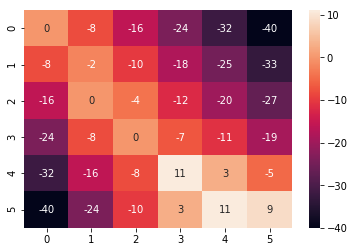

In [36]:
sns.heatmap([
    [0, -8, -16, -24, -32, -40], 
    [-8, -2, -10, -18, -25, -33], 
    [-16, 0, -4, -12, -20, -27], 
    [-24, -8, 0, -7, -11, -19], 
    [-32, -16, -8, 11, 3, -5], 
    [-40, -24, -10, 3, 11, 9]
],annot=True)

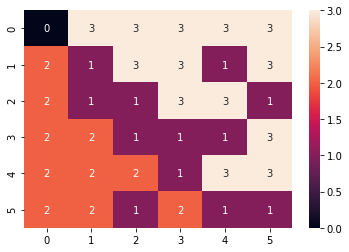

In [37]:
sns.heatmap([
    [0, 3, 3, 3, 3, 3], 
    [2, 1, 3, 3, 1, 3], 
    [2, 1, 1, 3, 3, 1], 
    [2, 2, 1, 1, 1, 3], 
    [2, 2, 2, 1, 3, 3], 
    [2, 2, 1, 2, 1, 1]
],annot=True)

### Multiple Sequence Alignment (MSA)
* Global
* Local $\rightarrow$ Motif Discovery
* pairwise++
    * Multi-Dimension DP $\rightarrow$ Large amount of calculation
    * Progressive $\rightarrow$ 基于相似序列通常具有进化相关性的假设 (e.g Clustal _Feng, Doolittle_)

#### Progressive (Simple)
1. Dist, Similarity Matrix
2. Guide Tree
3. Alignment

```bash
S1  P E E [V] T ...
S2  P E E [V] A ...
S3  P E E [A] A ...
S4  P E E [L] A ...

for S4: Score = (SM(V, L)*2 + SM(A, L)) / 3
```

In [39]:
class MyAlign:
    def __init__(self , lseqs, al_type = "protein"):
        self.listseqs = lseqs
        self.al_type = al_type

    def __len__(self): # number of columns
        return len(self.listseqs[0])

    def __getitem__(self, n):
        if type(n) is tuple and len(n) ==2:
            i, j = n
            return self.listseqs[i][j]
        elif type(n) is int: return self.listseqs[n]
        return None

    def __str__(self):
        res = ""
        for seq in self.listseqs:
            res += "\n" + seq
        return res

    def num_seqs(self):
        return len(self.listseqs)

    def column(self, indice): 
        res = []
        for k in range(len(self.listseqs)):
            res.append( self.listseqs[k][indice])
        return res

    def consensus (self):
        cons = ""
        for i in range(len(self)):
            cont = {}
            for k in range(len(self.listseqs)):
                c = self.listseqs[k][i]
                if c in cont:
                    cont[c] = cont[c] + 1
                else:
                    cont[c] = 1
            maximum = 0
            cmax = None
            for ke in cont.keys():
                if ke != "−" and cont[ke] > maximum:
                    maximum = cont[ke]
                    cmax = ke
            cons = cons + cmax
        return cons

if __name__ == "__main__":
    alig = MyAlign(["ATGA−A","AA−AT−"], "dna")
    print(alig)
    print(len(alig))
    print(alig.column(2))
    print(alig[1,1])
    print(alig[0])
    print(alig.consensus())


ATGA−A
AA−AT−
6
['G', '−']
A
ATGA−A
ATGATA


In [44]:
class PairWiseAligner:
    '''
    # Pairwise Alignment
    * Global Alignment: Needleman-Wunsch
    * Local Alignment: Smith-Waterman
    '''

    def __init__(self):
        '''Set DefaultValues'''
        self.gapSymbol = "-"
        self.defaultValue = 0
        self.newMatrix = {}

    def __repr__(self):
        '''Show the Content of Matrix'''
        from numpy import array
        return "Matrix(S):\n%s\n\nMatrix(T):\n%s\n" % (array(self.S), array(self.T))

    @property
    def defaultMatrix(self):
        '''Get Blosum Matrix Via BioPython'''
        from Bio.SubsMat import MatrixInfo
        matrix = MatrixInfo.blosum62
        return matrix

    def score_pos(self, c1, c2):
        '''Get Score of particular position via given matrix'''
        if c1 == self.gapSymbol or c2 == self.gapSymbol:
            return self.gap
        else:
            try:
                result = self.matrix[(c1, c2)]
            except KeyError:
                try:
                    result = self.matrix[(c2, c1)]
                except KeyError:
                    print("Unexpected key for given matrix, return defaultValue.")
                    return self.defaultValue
        return result

    def max3t(v1, v2, v3):
        '''Get the optimized direction'''
        if v1 > v2:
            if v1 > v3:
                return 1
            else:
                return 3
        else:
            if v2 > v3:
                return 2
            else:
                return 3

    def max_mat(mat):
        '''Get the row and col of optimized values'''
        maxval = mat[0][0]
        maxrow = 0
        maxcol = 0
        for i in range(0, len(mat)):
            for j in range(0, len(mat[i])):
                if mat[i][j] > maxval:
                    maxval = mat[i][j]
                    maxrow = i
                    maxcol = j
        return maxrow, maxcol

    def needleman_Wunsch(self):
        '''
        Global Alignment
        * Dynamic Programming
        * optimized
        '''
        self.S = [[0]]  # Record the score
        self.T = [[0]]  # Record the orientation
        # initialize gaps'row
        for j in range(1, len(self.seq2)+1):
            self.S[0].append(self.gap * j)
            self.T[0].append(3)
        # initialize gaps'column
        for i in range(1, len(self.seq1)+1):
            self.S.append([self.gap * i])
            self.T.append([2])
        # apply the recurrence relation to fill the remaining of the matrix
        for i in range(len(self.seq1)):
            for j in range(len(self.seq2)):
                s1 = self.S[i][j] + self.score_pos(self.seq1[i], self.seq2[j])
                s2 = self.S[i][j+1] + self.gap
                s3 = self.S[i+1][j] + self.gap
                self.S[i+1].append(max(s1, s2, s3))
                self.T[i+1].append(PairWiseAligner.max3t(s1, s2, s3))

    def smith_Waterman(self):
        '''
        Local Alignment
        * Dynamic Programming
        * optimized
        '''
        self.S = [[0]]  # Record the score
        self.T = [[0]]  # Record the orientation
        maxscore = 0
        for j in range(1, len(self.seq2)+1):
            self.S[0].append(0)
            self.T[0].append(0)
        for i in range(1, len(self.seq1)+1):
            self.S.append([0])
            self.T.append([0])
        for i in range(0, len(self.seq1)):
            for j in range(len(self.seq2)):
                s1 = self.S[i][j] + self.score_pos(self.seq1[i], self.seq2[j])
                s2 = self.S[i][j+1] + self.gap
                s3 = self.S[i+1][j] + self.gap
                b = max(s1, s2, s3)
                if b <= 0:
                    self.S[i+1].append(0)
                    self.T[i+1].append(0)
                else:
                    self.S[i+1].append(b)
                    self.T[i+1].append(PairWiseAligner.max3t(s1, s2, s3))
                    if b > maxscore:
                        maxscore = b
        return maxscore

    def recover_align_global(self):
        '''Get the content of global alignment'''
        res = ["", ""]
        i = len(self.seq1)
        j = len(self.seq2)
        while i > 0 or j > 0:
            if self.T[i][j] == 1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = self.gapSymbol + res[0]
                res[1] = self.seq2[j-1] + res[1]
                j -= 1
            else:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.gapSymbol + res[1]
                i -= 1
        return res

    def recover_align_local(self):
        '''Get the content of local alignment'''
        res = ["", ""]
        i, j = PairWiseAligner.max_mat(self.S)
        while self.T[i][j] > 0:
            if self.T[i][j] == 1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = self.gapSymbol + res[0]
                res[1] = self.seq2[j-1] + res[1]
                j -= 1
            elif self.T[i][j] == 2:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.gapSymbol + res[1]
                i -= 1
        return res

    def is_legal_matrix(self, matrix):
        '''Check whether the dict-form of matrix is legal or not'''
        if not isinstance(matrix, dict):
            print("Not a Dict", type(matrix))
            return False
        else:
            for key, data in matrix.items():
                if len(key) != 2:
                    print("Invalid Key")
                    return False
                else:
                    try:
                        int(data)
                    except Exception:
                        print("Invalid Data")
                        return False
            return True

    def new_matrix(self, pairs, value):
        '''Create new matrix via input'''
        self.newMatrix[tuple(pairs)] = value
        assert self.is_legal_matrix(self.newMatrix), "Illegal Matrix !"

    def align(self, seq1, seq2, gap=-8, matrix=False, mode='global'):
        '''Do the alignment'''
        if isinstance(matrix, bool):
            self.matrix = self.defaultMatrix
        else:
            self.matrix = matrix

        assert self.is_legal_matrix(self.matrix), "Illegal Matrix !"

        self.seq1 = seq1
        self.seq2 = seq2
        self.gap = gap

        if mode == 'global':
            self.needleman_Wunsch()
            alig = self.S[len(seq1)][len(seq2)], self.recover_align_global()
        elif mode == 'local':
            alig = self.smith_Waterman(), self.recover_align_local()
        else:
            alig = None

        return alig

    def look_alignment(self, align_a, align_b, start, end):
        '''Access the detailed result of the alignment'''
        sub_seq_a = align_a[start:end+1]
        sub_seq_b = align_b[start:end+1]
        return "%s\n%s\n%s" % (sub_seq_a, "|"*(end-start+1), sub_seq_b)

In [45]:
seq1 = "PHSWGPHSWG"
seq2 = "HGWAGPHSWG"
pwA = PairWiseAligner()
alignment = pwA.align(seq1, seq2, mode='global')
print(pwA)
print("Score:", alignment[0])
print(pwA.look_alignment(alignment[1][0], alignment[1][1], 0, 6))

Matrix(S):
[[  0  -8 -16 -24 -32 -40 -48 -56 -64 -72 -80]
 [ -8  -2 -10 -18 -25 -33 -33 -41 -49 -57 -65]
 [-16   0  -4 -12 -20 -27 -35 -25 -33 -41 -49]
 [-24  -8   0  -7 -11 -19 -27 -33 -21 -29 -37]
 [-32 -16  -8  11   3  -5 -13 -21 -29 -10 -18]
 [-40 -24 -10   3  11   9   1  -7 -15 -18  -4]
 [-48 -32 -18  -5   3   9  16   8   0  -8 -12]
 [-56 -40 -26 -13  -5   1   8  24  16   8   0]
 [-64 -48 -34 -21 -12  -5   0  16  28  20  12]
 [-72 -56 -42 -23 -20 -13  -8   8  20  39  31]
 [-80 -64 -50 -31 -23 -14 -15   0  12  31  45]]

Matrix(T):
[[0 3 3 3 3 3 3 3 3 3 3]
 [2 1 3 3 1 3 1 3 3 3 3]
 [2 1 1 3 3 1 3 1 3 3 3]
 [2 2 1 1 1 3 3 2 1 3 3]
 [2 2 2 1 3 3 3 3 3 1 3]
 [2 2 1 2 1 1 3 3 3 2 1]
 [2 2 2 2 2 1 1 3 3 3 2]
 [2 2 2 2 2 2 2 1 3 3 3]
 [2 2 2 2 1 1 2 2 1 3 3]
 [2 2 2 1 2 2 2 2 2 1 3]
 [2 2 2 2 1 1 1 2 2 2 1]]

Score: 45
PHSW-GP
|||||||
-HGWAGP


In [51]:
from itertools import combinations
seqs = list(combinations(["ATAGC", "AACC", "ATGAC"], 2))

In [55]:
for seq in seqs:
    print(pwA.align(seq[0], seq[1], mode='global'))

(6, ['ATAGC', 'A-ACC'])
(18, ['ATAGC', 'ATGAC'])
(5, ['AA-CC', 'ATGAC'])


```py
from Bio import Alphabet
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import IUPAC
from Bio.Seq import Seq
seq1 = "MHQAIFIYQIGYPLKSGYIQSIRSPEYDNW"
seq2 = "MH−−IFIYQIGYALKSGYIQSIRSPEY−NW"
seq3 = "MHQAIFI−QIGYALKSGY−QSIRSPEYDNW"
seqr1 = SeqRecord(Seq(seq1,Alphabet.Gapped(IUPAC.protein)),id="seq1")
seqr2 = SeqRecord(Seq(seq2,Alphabet.Gapped(IUPAC.protein)),id="seq2")
seqr3 = SeqRecord(Seq(seq3,Alphabet.Gapped(IUPAC.protein)),id="seq3")
alin = MultipleSeqAlignment([seqr1, seqr2, seqr3])
print(alin)
```

### Generate a Evolutionary/Phylogenetic Tree
* Classic
    * 形态学特征
    * 生理，生化，行为习性特征
    * 化石
    * 缺点: 表型一般与多个遗传因素相关，结果会产生偏差；化石样品难寻
* Molecular
    * 利用从遗传物质中提取的信息作为特征 
    * 即利用核酸或蛋白质序列（molecular fossil)
    * 优点：数量大，获取容易

#### Node
* taxonomy单位

#### Branch
* node与node间关系？
* branch长度反映当这件事发生时就存在的蛋白质与现在的蛋白质之间的距离

#### Rooted Tree and Unrooted Tree
* rooted tree: 树上物种或基因进化的时间顺序，可显示共同祖先
* unrooted tree: 树系中代表时间视最早的共同祖先不能确定，只反映分类单元间的距离

#### Application
* 物种分类及定义
* 功能注释
* 法医等领域

#### Distannce-Based Algorithms
* 在距离矩阵的基础上，根据双序列比对时的差异程度建立进化树
* 目标函数: 测量树中叶子（代表序列）之间距离的一致性，这些距离是通过序列相似性（通过序列比对）获得的
* 序列间的距离矩阵：序列间的相似性的倒数-序列比对 
* 已知距离矩阵，目标函数可以定义为使误差函数即树中距离和矩阵中距离的误差最小:
$$\text{score}(T) = \sum_{i,j \in S}(d_{ij}(T)-D_{ij})^2$$
    * S是输入的序列
    * T表示树
    * dij(T)表示序列i和j在树中的距离
    * Dij表示在矩阵中的距离
* 树中节点u和v的距离，与从u到v游走的垂直距离。如果w是这两个点的最近祖先，那么u和v的距离为$d_{uw} + d_{wv}$
* $d_{uw} = h(w) - h(u)$
* $d_{wv} = h(w) - h(v)$ 其中h(x)表示节点在树中的高度 
* ```NP-hard```

##### Unweighted Pair Group Method Using Arithmetic Averages (UPGMA)
> Unweighted; Pair Group; Arithmetic Average

* 凝聚层次聚类算法
* 步骤
    * 将每个序列看成一个聚类，并设置高度为0
    * 将距离最近的序列或聚类 (距离矩阵中最小的数值) 合并成内部节点，并设置在树中高度为序列距离的一半
    * 这些序列在下回迭代中将会被看作一个聚类，距离将会是与剩余的序列节点距离的平均值
    * 具以上更新距离矩阵

$$\dfrac{1}{\left| A \right|.\left| B \right|} \sum_{i \in A} \sum_{j \in B} D_{ij} $$


$$D(A\cup B, X) = \dfrac{\left| A \right|.D(A,X) + \left|B \right|.D(B,X)}{\left| A \right|+\left|B\right|}$$


$$D(A\cup B, X) = \dfrac{D(A,X) + D(B,X)}{2}$$
#### Maximum Parsimony
* 包括了通过确定可以解释序列最小可变性的必须突变的方法
* 基本假设：生物序列总是采用某种“最节约成本”或“最经济”的方法完成进化
* 计算量小,适用于大规模系统树构建。软件有MEGA和phylip 
#### Statistical/Bayesian Methods/最大似然法？
* 定义不同类型突变发生率的概率模型，基于次对进化树进行评分, 根据假设的模型搜索最 可能解释序列的树
* 适用于探索远缘序列间的关系。软件有DNAML和DNALK

#### Use Binary Tree to represent Phylogenetic Tree
* 假设：所有的内部节点都有两个分支
* 每个内部节点包含了高度信息（数值型)
* 每个叶子包含了序列的索引（整数型）